In [1]:
import torch
from torch import nn, optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [2]:
def show_data(data_sample):
  plt.imshow(data_sample[0].numpy().reshape(28,28), cmap='gray')
  plt.title(f'y= {data_sample[1]}')

In [3]:
train_set = dsets.MNIST(root='/.data', train=True, download=True, transform=transforms.ToTensor());
print(train_set)

100%|██████████| 9912422/9912422 [00:00<00:00, 86583055.30it/s]


Extracting /.data/MNIST/raw/train-images-idx3-ubyte.gz to /.data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 34799107.68it/s]

Extracting /.data/MNIST/raw/train-labels-idx1-ubyte.gz to /.data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 45659996.68it/s]


Extracting /.data/MNIST/raw/t10k-images-idx3-ubyte.gz to /.data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3694827.15it/s]


Extracting /.data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /.data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: /.data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
validation_set = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print(validation_set)

100%|██████████| 9912422/9912422 [00:00<00:00, 106565587.00it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 4462377.29it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44893226.94it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21238047.68it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


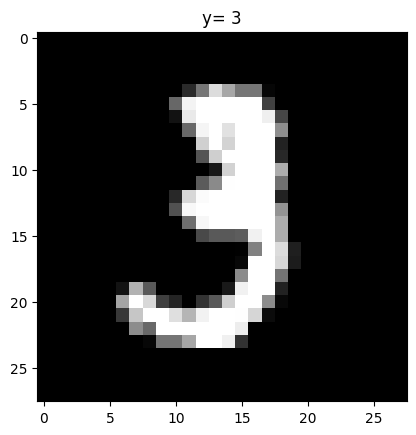

In [5]:
show_data(train_set[10])

In [6]:
class Softmax(nn.Module):
  def __init__(self, input_size, output_size):
    super(Softmax, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self,x):
    return self.linear(x)

In [7]:
train_set[4][0].shape

torch.Size([1, 28, 28])

In [8]:
input_size = 28*28
output_size = 10
model = Softmax(input_size, output_size)

In [9]:
print('weights size: ',list(model.parameters())[0].shape)
print('bias size: : ',list(model.parameters())[1].shape)

weights size:  torch.Size([10, 784])
bias size: :  torch.Size([10])


In [10]:
train_loader = DataLoader(train_set, batch_size = 100)
validation_loader = DataLoader(validation_set, batch_size=5000)

In [11]:
lr = 0.1
optimizer = optim.SGD(model.parameters(), lr = lr)
criterion = nn.CrossEntropyLoss()

In [12]:
loss_list=[]
accuracy_list=[]
epochs = 12
iterations = [i for i in range(epochs)]
N_cv = len(validation_set)
def training_model(epochs):
  for epoch in range(epochs):
    for x,y in train_loader:
      y_hat = model(x.view(-1,28*28))
      loss = criterion(y_hat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    correct=0
    for x_cv, y_cv in validation_loader:
      z = model(x_cv.view(-1, 28*28))
      _,y_hat_cv = torch.max(z, 1)
      correct += (y_hat_cv == y_cv).sum().item()
    accuracy = correct / N_cv
    loss_list.append(loss.data)
    accuracy_list.append(accuracy)
    print(f'Epoch: {epoch} ------ Loss: {loss} ------ Accuracy: {accuracy}')


In [13]:
training_model(epochs)

Epoch: 0 ------ Loss: 0.4106312096118927 ------ Accuracy: 0.893
Epoch: 1 ------ Loss: 0.36213409900665283 ------ Accuracy: 0.9033666666666667
Epoch: 2 ------ Loss: 0.3424684405326843 ------ Accuracy: 0.9093
Epoch: 3 ------ Loss: 0.33093491196632385 ------ Accuracy: 0.9123333333333333
Epoch: 4 ------ Loss: 0.32289910316467285 ------ Accuracy: 0.9143166666666667
Epoch: 5 ------ Loss: 0.31673359870910645 ------ Accuracy: 0.9163666666666667
Epoch: 6 ------ Loss: 0.31171715259552 ------ Accuracy: 0.9173333333333333
Epoch: 7 ------ Loss: 0.3074778616428375 ------ Accuracy: 0.9183833333333333
Epoch: 8 ------ Loss: 0.30380141735076904 ------ Accuracy: 0.9192833333333333
Epoch: 9 ------ Loss: 0.30055293440818787 ------ Accuracy: 0.9200166666666667
Epoch: 10 ------ Loss: 0.29764172434806824 ------ Accuracy: 0.9208166666666666
Epoch: 11 ------ Loss: 0.2950035035610199 ------ Accuracy: 0.9215


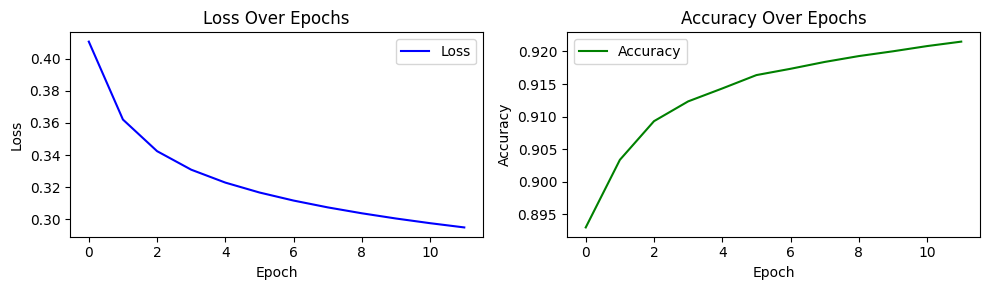

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))


axs[0].plot(iterations, loss_list, label='Loss', color='blue')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss Over Epochs')
axs[0].legend()

axs[1].plot(iterations, accuracy_list, label='Accuracy', color='green')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy Over Epochs')
axs[1].legend()

plt.tight_layout()

plt.show()